## Observations and Insights

In [ ]:
1. There are about the same number of female mice as there are male mice in this study.
2. Pymaceuticals' drug of interest, Capomulin, and Ramicane are the most promising treatments.
3. There is a strong correlation between mouse weight and average tumor volume in mice treated with Capomulin.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Import study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
# Prepare DataFrame
study_results = pd.read_csv(study_results)
study_results.head()

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Groupby Regimen for next step
grouped_df = merge_df.groupby(["Drug Regimen"])
grouped_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
692,c580,Ketapril,Male,22,25,10,47.570174,1
693,c580,Ketapril,Male,22,25,15,51.991708,1
694,c580,Ketapril,Male,22,25,20,55.575322,2
695,c580,Ketapril,Male,22,25,25,56.289062,2


In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the TUMOR VOLUME for each regimen
# Find mean
tm_mean = pd.DataFrame(grouped_df["Tumor Volume (mm3)"].mean())
tm_mean.head()

# # Find median
tm_median = pd.DataFrame(grouped_df["Tumor Volume (mm3)"].median())
tm_median.head()

# # Find variance
tm_var = pd.DataFrame(grouped_df["Tumor Volume (mm3)"].var())
tm_var.head()

# # Find standard deviation
tm_stdev = pd.DataFrame(grouped_df["Tumor Volume (mm3)"].std())
tm_stdev.head()

# # Find SEM of tumor volume for each regimen
tm_sem = pd.DataFrame(grouped_df["Tumor Volume (mm3)"].sem())
tm_sem.head()

# Create summary table
summary = grouped_df.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary2 = summary.rename({'mean': 'Mean', 'median': 'Median', 'var': "Variance", 'std': "Standard Deviation", 'sem': "SEM"}, axis='columns')
summary2

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.322552  50.854632  42.351070           6.507770   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.512884  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar plots

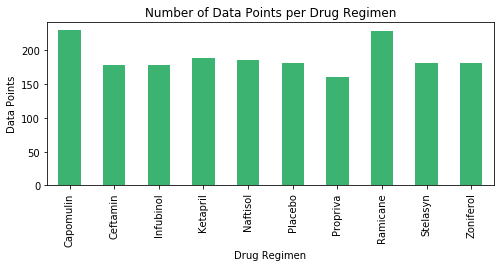

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_chart = grouped_df["Drug Regimen"].value_counts()
bar_chart.plot(kind="bar", figsize = (8,3), color="mediumseagreen")
plt.title("Number of Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation="vertical")
plt.show()

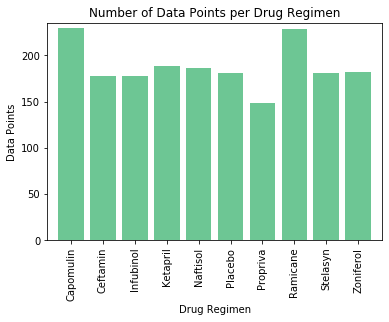

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
points = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

x_axis = np.arange(len(grouped_df))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Number of Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(0, max(points) + 5)
plt.bar(x_axis, points, facecolor="mediumseagreen", alpha=0.75, align="center")
plt.xticks(tick_locations, drugs, rotation="vertical")
plt.show()

## Pie plots

Text(0.5, 1.0, 'Female vs. Male Mice')

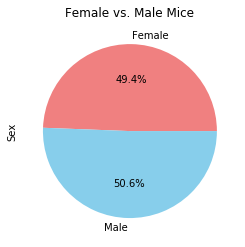

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["lightcoral", "skyblue"]
gender_df = merge_df.groupby(["Sex"])
mice = gender_df["Sex"].count()
mice_plot = mice.plot.pie(colors=colors, autopct='%1.1f%%')
plt.title("Female vs. Male Mice")

([<matplotlib.patches.Wedge at 0x1a1b0a4110>,
 [Text(0.020992503472585564, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.011450456439592124, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

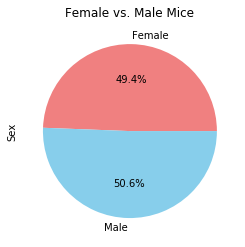

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
micee = ("Female", "Male")
colors = ("lightcoral", "skyblue")
plt.title("Female vs. Male Mice")
plt.ylabel("Sex")
plt.pie(mice, labels=micee, colors=colors, autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Set up regimen data
ftv_df = merge_df.sort_values(['Mouse ID', 'Timepoint'])
ftv_df = ftv_df.drop_duplicates(['Mouse ID'],keep='last')
ftv_df.set_index('Drug Regimen', inplace=True)
ftv_df = ftv_df.drop(['Mouse ID', 'Sex','Age_months', 'Weight (g)','Metastatic Sites'], axis=1)

cap = ftv_df.loc['Capomulin']
ram = ftv_df.loc['Ramicane']
inf = ftv_df.loc['Infubinol']
cef = ftv_df.loc['Ceftamin']

In [10]:
# Capomulin stats
cap.columns = ("Timepoint", "Tumor")
quartiles = cap.Tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Capomulin final tumor volume is: {lowerq} (mm3).")
print(f"The upper quartile of Capomulin final tumor volume is: {upperq} (mm3).")
print(f"The interquartile range of Capomulin final tumor volume is: {iqr} (mm3).")
print(f"The median of Capomulin final tumor volume is: {quartiles[0.5]} (mm3).")
print(f"Values below {lower_bound} (mm3) could be outliers for Capomulin.")
print(f"Values above {upper_bound} (mm3) could be outliers for Capomulin.")

The lower quartile of Capomulin final tumor volume is: 32.37735684 (mm3).
The upper quartile of Capomulin final tumor volume is: 40.1592203 (mm3).
The interquartile range of Capomulin final tumor volume is: 7.781863460000004 (mm3).
The median of Capomulin final tumor volume is: 38.125164399999996 (mm3).
Values below 20.70456164999999 (mm3) could be outliers for Capomulin.
Values above 51.83201549 (mm3) could be outliers for Capomulin.


In [11]:
# Ramicane stats
ram.columns = ("Timepoint", "Tumor")
quartiles = ram.Tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Ramicane final tumor volume is: {lowerq} (mm3).")
print(f"The upper quartile of Ramicane final tumor volume is: {upperq} (mm3).")
print(f"The interquartile range of Ramicane final tumor volume is: {iqr} (mm3).")
print(f"The median of Ramicane final tumor volume is: {quartiles[0.5]} (mm3).")
print(f"Values below {lower_bound} (mm3) could be outliers for Ramicane.")
print(f"Values above {upper_bound} (mm3) could be outliers for Ramicane.")

The lower quartile of Ramicane final tumor volume is: 31.56046955 (mm3).
The upper quartile of Ramicane final tumor volume is: 40.65900627 (mm3).
The interquartile range of Ramicane final tumor volume is: 9.098536719999998 (mm3).
The median of Ramicane final tumor volume is: 36.56165229 (mm3).
Values below 17.912664470000003 (mm3) could be outliers for Ramicane.
Values above 54.30681135 (mm3) could be outliers for Ramicane.


In [12]:
# Infubinol stats
inf.columns = ("Timepoint", "Tumor")

quartiles = inf.Tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Infubinol final tumor volume is: {lowerq} (mm3).")
print(f"The upper quartile of Infubinol final tumor volume is: {upperq} (mm3).")
print(f"The interquartile range of Infubinol final tumor volume is: {iqr} (mm3).")
print(f"The median of Infubinol final tumor volume is: {quartiles[0.5]} (mm3).")
print(f"Values below {lower_bound} (mm3) could be outliers for Infubinol.")
print(f"Values above {upper_bound} (mm3) could be outliers for Infubinol.")

The lower quartile of Infubinol final tumor volume is: 54.04860769 (mm3).
The upper quartile of Infubinol final tumor volume is: 65.52574285 (mm3).
The interquartile range of Infubinol final tumor volume is: 11.477135160000003 (mm3).
The median of Infubinol final tumor volume is: 60.16518046 (mm3).
Values below 36.83290494999999 (mm3) could be outliers for Infubinol.
Values above 82.74144559000001 (mm3) could be outliers for Infubinol.


In [13]:
# Ceftamin stats
cef.columns = ("Timepoint", "Tumor")

quartiles = cef.Tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Ceftamin final tumor volume is: {lowerq} (mm3).")
print(f"The upper quartile of Ceftamin final tumor volume is: {upperq} (mm3).")
print(f"The interquartile range of Ceftamin final tumor volume is: {iqr} (mm3).")
print(f"The median of Ceftamin final tumor volume is: {quartiles[0.5]} (mm3).")
print(f"Values below {lower_bound} (mm3) could be outliers for Ceftamin.")
print(f"Values above {upper_bound} (mm3) could be outliers for Ceftamin.")

The lower quartile of Ceftamin final tumor volume is: 48.72207785 (mm3).
The upper quartile of Ceftamin final tumor volume is: 64.29983003 (mm3).
The interquartile range of Ceftamin final tumor volume is: 15.577752179999997 (mm3).
The median of Ceftamin final tumor volume is: 59.85195552 (mm3).
Values below 25.355449580000002 (mm3) could be outliers for Ceftamin.
Values above 87.66645829999999 (mm3) could be outliers for Ceftamin.


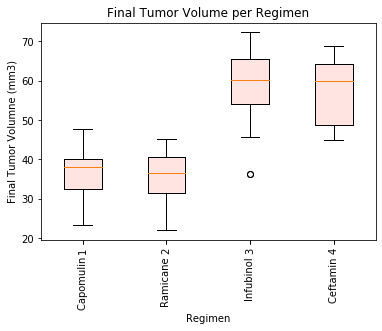

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume per Regimen")
ax1.set_xlabel("Regimen")
ax1.set_ylabel('Final Tumor Volumne (mm3)')
ax1.boxplot([cap.Tumor, ram.Tumor, inf.Tumor, cef.Tumor])
plt.xticks([1, 2, 3, 4], ['Capomulin   ', 'Ramicane   ', 'Infubinol   ', 'Ceftamin   '], rotation="vertical")
boxprops = dict(color="black",linewidth=1.5)
plt.boxplot([cap.Tumor, ram.Tumor, inf.Tumor, cef.Tumor], positions=[1, 2, 3, 4], patch_artist=True, boxprops=dict(facecolor='mistyrose'))
plt.show()

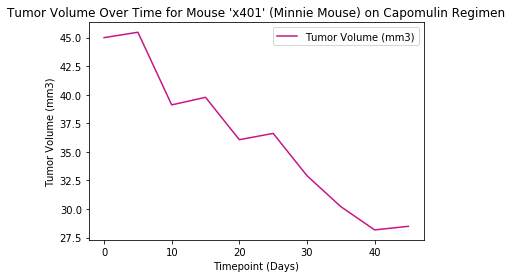

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Female mouse "x401" chosen
minnie_mouse = merge_df.loc[merge_df["Drug Regimen"]== "Capomulin"]
minnie = minnie_mouse.loc[minnie_mouse["Mouse ID"]=="x401"]
minnie.plot(kind='line',x="Timepoint",y="Tumor Volume (mm3)", color="mediumvioletred")
plt.ylabel('Tumor Volume (mm3)')
plt.title("Tumor Volume Over Time for Mouse 'x401' (Minnie Mouse) on Capomulin Regimen")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

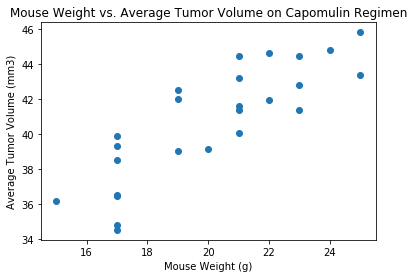

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
elim = merge_df.drop(['Sex', 'Age_months', 'Timepoint', 'Metastatic Sites'], axis=1)
scatter = elim.loc[(merge_df['Drug Regimen'] == 'Capomulin')] 
avg_mouse = scatter.groupby(['Mouse ID'])
avg_mouse = avg_mouse.mean()

x_values = avg_mouse["Weight (g)"]
y_values = avg_mouse["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values)
plt.title("Mouse Weight vs. Average Tumor Volume on Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show scatter plot
plt.show()

The correlation between both factors is 0.84.


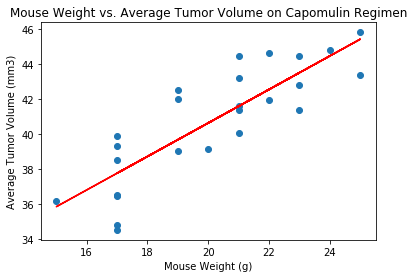

In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Add scatter plot data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse Weight vs. Average Tumor Volume on Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Calculate correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}.")

# Show final linear regression model
plt.show()